In [7]:
import gradio as gr    #gradio provides an interface for machine learning models to run 

Import all the necessary libraries

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Import the dataset from local storage

In [9]:
import pathlib

# Specify the path to your local dataset directory
local_data_dir = r'D:\SEM 6\IOT\dataset_new\plantvillage'

# Convert the local directory path to a pathlib.Path object
data_dir = pathlib.Path(local_data_dir)

# Check if the directory exists
if not data_dir.exists():
    print("Error: Directory not found.")
else:
    # Proceed with your data loading code
    # For example, you can iterate over images in the directory like this:
    for image_path in data_dir.glob('*/*.jpg'):  # assuming images are in jpg format
        # Process each image as needed
        print(image_path)


D:\SEM 6\IOT\dataset_new\plantvillage\Tomato___Bacterial_spot\00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG
D:\SEM 6\IOT\dataset_new\plantvillage\Tomato___Bacterial_spot\0045ba29-ed1b-43b4-afde-719cc7adefdb___GCREC_Bact.Sp 6254.JPG
D:\SEM 6\IOT\dataset_new\plantvillage\Tomato___Bacterial_spot\00639d29-2d1a-4fcf-9bd3-a2b3109c74c4___UF.GRC_BS_Lab Leaf 1054.JPG
D:\SEM 6\IOT\dataset_new\plantvillage\Tomato___Bacterial_spot\00a7c269-3476-4d25-b744-44d6353cd921___GCREC_Bact.Sp 5807.JPG
D:\SEM 6\IOT\dataset_new\plantvillage\Tomato___Bacterial_spot\00b7e89a-e129-4576-b51f-48923888bff9___GCREC_Bact.Sp 6202.JPG
D:\SEM 6\IOT\dataset_new\plantvillage\Tomato___Bacterial_spot\01375198-62af-4c40-bddf-f3c11107200b___GCREC_Bact.Sp 5914.JPG
D:\SEM 6\IOT\dataset_new\plantvillage\Tomato___Bacterial_spot\014b58ae-091b-408a-ab4a-5a780cd1c3f3___GCREC_Bact.Sp 2971.JPG
D:\SEM 6\IOT\dataset_new\plantvillage\Tomato___Bacterial_spot\01a3cf3f-94c1-44d5-8972-8c509d62558e___GCREC_Bact.Sp 3396.JPG
D:\

Test

D:\SEM 6\IOT\dataset_new\plantvillage\Tomato___healthy\000146ff-92a4-4db6-90ad-8fce2ae4fddd___GH_HL Leaf 259.1.JPG


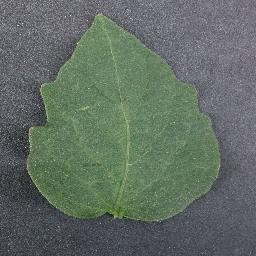

In [ ]:
healthy = list(data_dir.glob('Tomato___healthy/*'))
print(healthy[0])
PIL.Image.open(str(healthy[0]))

Preparing a dataset for training a neural network using images from a directory, with images resized to 180x180 pixels and a batch size of 32.

In [11]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2, #Specifies that 20% of the data will be reserved for validation.
  subset="training",    #indicates that this dataset is for training purposes
  seed=123,
  image_size=(img_height, img_width), #specify the size of image
  batch_size=batch_size)  #sets the batch size for loading images during training

Found 14529 files belonging to 10 classes.
Using 11624 files for training.


Creating a validation dataset for training the neural network

In [12]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
     

Found 14529 files belonging to 10 classes.
Using 2905 files for validation.


In [13]:
class_names = train_ds.class_names
print(class_names)

['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


Using matplotlib, we will display the first 9 images from the training dataset

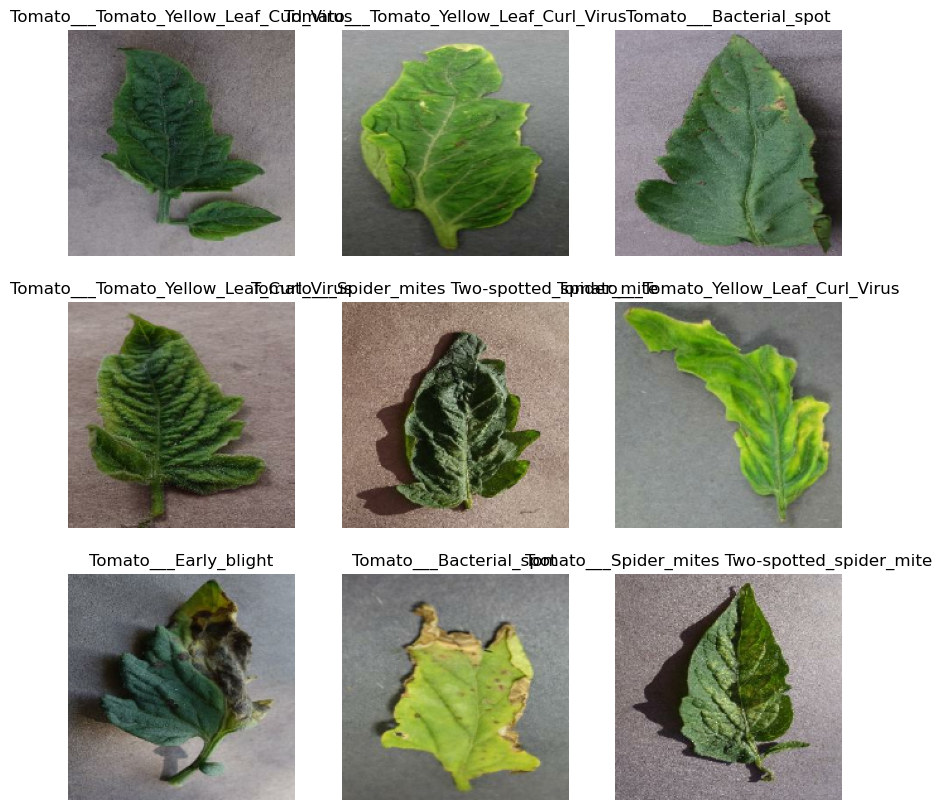

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1): #iterating over each batch
  for i in range(9):   #will iterate first 9 images in the batch
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Build of  convolutional neural network (CNN) model using TensorFlow's Keras API.

In [17]:
num_classes = 10    # 10 different classes

#initializes a seqeuntial model
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)), #rescaling
  layers.Conv2D(16, 3, padding='same', activation='relu'),  #Adds a 2D convolutional layer with 16 filters, each with a 3x3 kernel size. 
  layers.MaxPooling2D(),   #Adds a max-pooling layer. This reduces the spatial dimensions of the input volume.
  layers.Conv2D(32, 3, padding='same', activation='relu'),  #Adds another 2D convolutional layer similar to the previous one but with 32 filters.
  layers.MaxPooling2D(),    #Adds another max-pooling layer.
  layers.Conv2D(64, 3, padding='same', activation='relu'), #Adds another 2D convolutional layer with 64 filters.
  layers.MaxPooling2D(),
  layers.Flatten(),  #transforming it into a 1D array
  layers.Dense(128, activation='relu'),  #Adds a fully connected (dense) layer with 128 units and ReLU activation function.
  layers.Dense(num_classes,activation='softmax') #Adds the output layer with num_classes units (10 in this case) and a softmax activation function. 
])

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


c:\Users\kshit\anaconda3\Lib\site-packages\keras\src\backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(



364/364 [==============================] - 54s 145ms/step - loss: 1.0081 - accuracy: 0.6602 - val_loss: 0.5613 - val_accuracy: 0.8124
Epoch 2/10
364/364 [==============================] - 60s 165ms/step - loss: 0.4139 - accuracy: 0.8544 - val_loss: 0.3150 - val_accuracy: 0.9029
Epoch 3/10
364/364 [==============================] - 57s 156ms/step - loss: 0.2561 - accuracy: 0.9106 - val_loss: 0.3099 - val_accuracy: 0.9009
Epoch 4/10
364/364 [==============================] - 53s 146ms/step - loss: 0.1780 - accuracy: 0.9377 - val_loss: 0.3656 - val_accuracy: 0.8867
Epoch 5/10
364/364 [==============================] - 56s 152ms/step - loss: 0.1296 - accuracy: 0.9559 - val_loss: 0.3284 - val_accuracy: 0.9036
Epoch 6/10
364/364 [==============================] - 55s 150ms/step - loss: 0.0947 - accuracy: 0.9679 - val_loss: 0.2716 - val_accuracy: 0.9208
Epoch 7/10
364/364 [==============================] - 54s 148ms/step - loss: 0.0703 - accuracy: 0.9761 - val_loss: 0.3244 - val_accuracy: 0.

In [20]:

def predict_image(img):
  img_4d=img.reshape(-1,180,180,3)
  prediction=model.predict(img_4d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(10)}

import gradio as gr

image = gr.inputs.Image(shape=(180,180))
label = gr.outputs.Label(num_top_classes=10)

gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')
    



C:\Users\kshit\AppData\Local\Temp\ipykernel_28548\1763260447.py:8: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  image = gr.inputs.Image(shape=(180,180))
C:\Users\kshit\AppData\Local\Temp\ipykernel_28548\1763260447.py:8: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  image = gr.inputs.Image(shape=(180,180))
C:\Users\kshit\AppData\Local\Temp\ipykernel_28548\1763260447.py:9: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  label = gr.outputs.Label(num_top_classes=10)
C:\Users\kshit\AppData\Local\Temp\ipykernel_28548\1763260447.py:9: GradioUnusedKwargWarning: You have unused kwarg parameters in Label, please remove them: {'type': 'auto'}
  label = gr.outputs.Label(num_top_classes=10)


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


1/1 [==============================] - 0s 56ms/step
Keyboard interruption in main thread... closing server.
